This repo is based on the tutorial of sklearn from
https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html
The goal is to familiarize sklearn for data analysis. We analyze two data sets below
* a generated regression data set 
* Iris data set

For the former data set, we applied least square method, lasso and Ridge. The result is surprising good so we further study the data-generating method. 

For the Iris data set, we applied Naive Bayes, Clustering (GMM), Random Forest and SVR with systematic hyper-parameters search. The scores of each method is compared in the last session. 

reference: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## linear regression

### artificial regression data

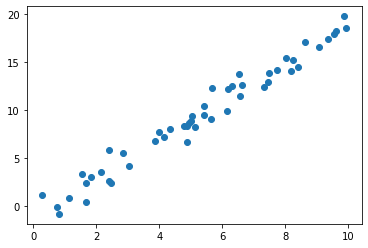

In [22]:
rng = np.random.RandomState()
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

In [23]:
x.shape

(50,)

In [24]:
## to make x, y just 1d vectors
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [25]:
x.reshape(-1,1).shape

(50, 1)

### Least square regression

In [26]:
from sklearn import linear_model
reg = linear_model.LinearRegression(fit_intercept=True)
reg.fit(x, y)  ## reshape required for 1D -> 2D
# One shape dimension can be -1. In this case, the value is inferred from the length 
# of the array and remaining dimensions.
#LinearRegression()
print(reg.coef_, reg.intercept_)

[[1.99049988]] [-1.06740928]


In [29]:
reg.score(x, y)

0.9700778177465408

### Ridge (with regulation)

In [30]:
from sklearn import linear_model
regr = linear_model.Ridge(alpha=.8)
regr.fit(x, y)
print(regr.coef_, regr.intercept_)

[[1.98620477]] [-1.04459482]


In [31]:
regr.score(x, y)

0.9700733009510726

### Ridge CV

In [32]:
regCV = linear_model.RidgeCV(alphas=np.logspace(-6, 6, 13))
regCV.fit(x, y)
regCV.alpha_

0.1

In [33]:
print(regCV.coef_, regCV.intercept_)

[[1.98996197]] [-1.06455208]


If the function we want to optimize is convex, Lasso will force some coefficients to be zero because $\sum|\beta_i| <= t$ is a polygon and the optimum lies on one of the vertices, which is many $\beta_i = 0$. 

In [34]:
regCV.score(x, y)

0.9700777469043536

### Visualize

In [10]:
xfit = np.linspace(-1, 11) ## default number is 50
Xfit = xfit.reshape(-1,1)
yreg = reg.predict(Xfit)
yregr = regr.predict(Xfit)
yregCV = regCV.predict(Xfit)

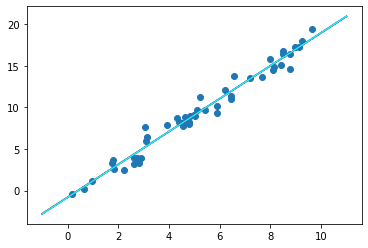

In [11]:
plt.scatter(x, y)
plt.plot(xfit, yreg, 'b');
plt.plot(xfit, yregr, color = 'red');
plt.plot(xfit, yregCV, color = 'cyan');
# too close to see different lines

### Create regression problem and cross validate

In [12]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

X, y = make_regression(n_samples=1000, random_state=0, n_informative = 5)
lr = LinearRegression()
result = cross_validate(lr, X, y)  # defaults to 5-fold CV
result['test_score']  # r_squared score is high because dataset is easy

array([1., 1., 1., 1., 1.])

(1000,)

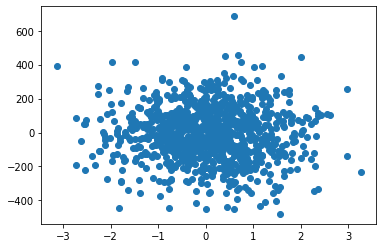

In [13]:
plt.scatter(X[:, 1], y);
X[:,1].shape

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)
lr.fit(Xtrain, ytrain)
y_lr = lr.predict(Xtest)

In [15]:
ytest-y_lr;

In [16]:
ybar = np.mean(ytest) 
sum((ytest[i]-ybar)**2 for i in range(len(ytest)))

6887682.406370714

In [17]:
sum((ytest[i]-y_lr[i])**2 for i in range(len(ytest)))

5.134174076696079e-23

In [18]:
from sklearn.metrics import r2_score
r2_score(y_lr, ytest)

1.0

In [19]:
from sklearn.decomposition import PCA  # 1. Choose the model class
pca = PCA(n_components = 50, svd_solver = 'full')   ## 2. Instantiate the model with hyperparameters
pca.fit(np.column_stack((X, y)))                 # 3. Fit to data. Notice y is not specified!
X_50 = pca.transform(np.column_stack((X, y)))         # 4. Transform the data to two dimensions

In [20]:
np.column_stack((X, y)).shape

(1000, 101)

In [21]:
pca.singular_values_

array([4966.72399954,   40.85643491,   40.32442053,   39.81946949,
         39.64472827,   39.56506399,   39.38635955,   39.09164836,
         38.77399983,   38.56631275,   38.38202159,   38.1099484 ,
         37.81905052,   37.67263769,   37.33341094,   37.0582025 ,
         36.94756968,   36.86610466,   36.68357916,   36.53365707,
         36.27244457,   35.94140542,   35.63487985,   35.57073239,
         35.46806166,   35.18121397,   35.0584567 ,   34.71896654,
         34.69751759,   34.52202971,   34.42370484,   33.97945288,
         33.94194381,   33.85045281,   33.79149174,   33.51564811,
         33.34137378,   33.22191897,   33.17353252,   32.66565994,
         32.62395653,   32.57231075,   32.2933767 ,   32.02713172,
         31.88621585,   31.78665472,   31.68688824,   31.43221074,
         31.15844209,   31.13107517])

In [22]:
X2,y2 = make_regression(n_samples=200,n_features=2,n_targets=1,noise=5, n_informative = 1)

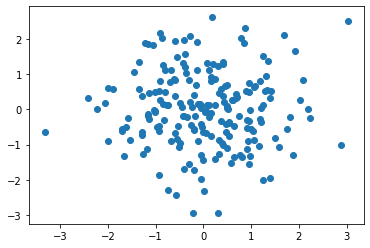

In [23]:
plt.scatter(X2[:,0], X2[:,1])

In [24]:
from sklearn.decomposition import PCA  # 1. Choose the model class
pca = PCA(n_components = 2, svd_solver = 'full')            # 2. Instantiate the model with hyperparameters
pca.fit(np.column_stack((X2, y2)))                     # 3. Fit to data. Notice y is not specified!
pca.singular_values_

array([1071.71485401,   14.49101473])

In [25]:
X22 = pca.transform(np.column_stack((X2, y2)))
X22.shape        

(200, 2)

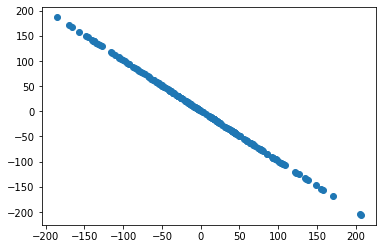

In [26]:
plt.scatter(X22[:,0], y2);

In [27]:
X22[:,1]

array([ 3.29131734e-01,  1.28491304e+00, -3.79946587e-01,  1.37567863e+00,
        1.64008334e+00, -9.28817791e-01,  1.30110406e+00,  9.31573370e-01,
        1.03256567e+00,  1.55597889e+00, -4.42729201e-01, -4.61625019e-01,
        1.18168894e+00,  1.19415478e+00, -6.82279786e-01,  6.98621374e-01,
       -8.51387179e-01,  1.36337446e+00,  4.42151161e-01,  6.98217704e-01,
        9.54788674e-01, -1.33256155e-01,  5.18358626e-01, -1.03696765e+00,
        1.00132845e+00, -8.97131158e-01,  2.92686199e-02, -9.60295946e-01,
        5.84603002e-01,  6.13941291e-01, -1.40997006e-01, -6.26089975e-01,
       -9.38037079e-01, -1.79940051e+00, -6.12712255e-01,  6.20137385e-01,
       -2.94631017e-01, -1.39098728e+00, -3.04603930e-01, -1.71863253e+00,
       -8.17456059e-01, -1.16968230e+00,  7.54858908e-01, -9.48917173e-01,
        1.30191909e+00,  4.17002181e-01, -2.07143482e+00, -2.12817415e-01,
        4.76956092e-01, -7.88200778e-01,  2.01679834e+00,  8.94843176e-01,
       -1.22957745e+00, -

## Naive Bayes for Iris 

### Iris data

In [28]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


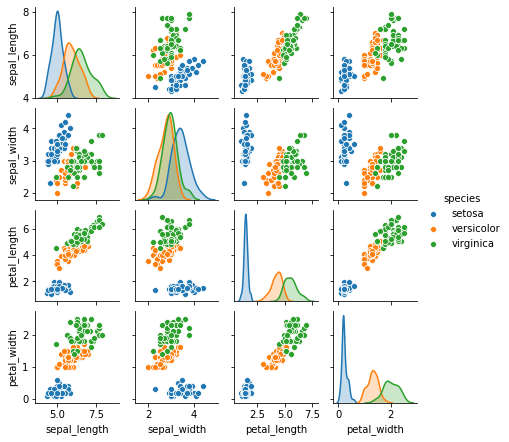

In [29]:
sns.pairplot(iris, hue='species', height=1.5);

In [30]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [31]:
y_iris = iris['species']
y_iris.shape

(150,)

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [33]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler().fit(X_iris)
X_strain = scaler.transform(X_train)
X_stest = scaler.transform(X_test)

### Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
GauNB = GaussianNB()                       # 2. instantiate model
GauNB.fit(X_train, y_train)                  # 3. fit model to data
y_GauNB = GauNB.predict(X_test)             # 4. predict on new data

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_GauNB)

0.9736842105263158

In [36]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
GauNB = GaussianNB()                       # 2. instantiate model
GauNB.fit(X_strain, y_train)                  # 3. fit model to data
y_GauNB = GauNB.predict(X_stest)             # 4. predict on new data

In [37]:
accuracy_score(y_test, y_GauNB)

0.9736842105263158

## PCA and clustering for Iris

### Use PCA to visualize Iris data in 2D

In [38]:
from sklearn.decomposition import PCA  # 1. Choose the model class
pca = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
pca.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = pca.transform(X_iris)         # 4. Transform the data to two dimensions

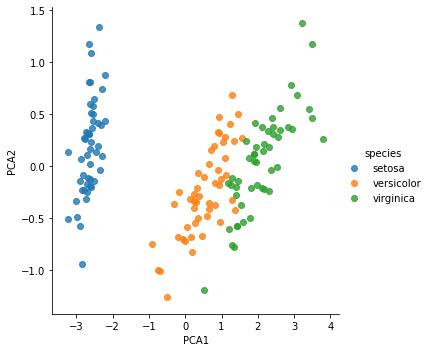

In [39]:
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### GMM clustering for Iris

In [40]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
gmm = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
gmm.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = gmm.predict(X_iris)        # 4. Determine cluster labels

In [41]:
# the entries of y_gmm is {0,1,2} and the entries of y_iris is names so we need to transform 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.classes_ = ['virginica', 'setosa', 'versicolor']
le.transform(y_iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [42]:
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
accuracy_score(le.transform(y_iris), y_gmm)

0.9666666666666667

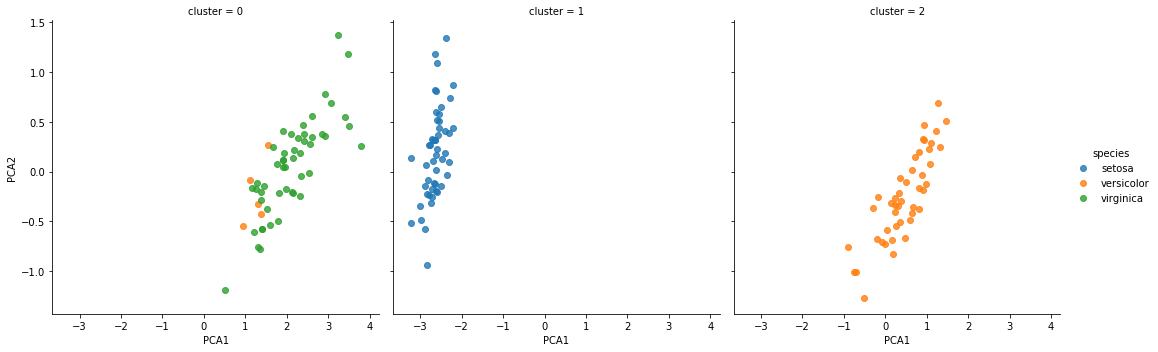

In [44]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

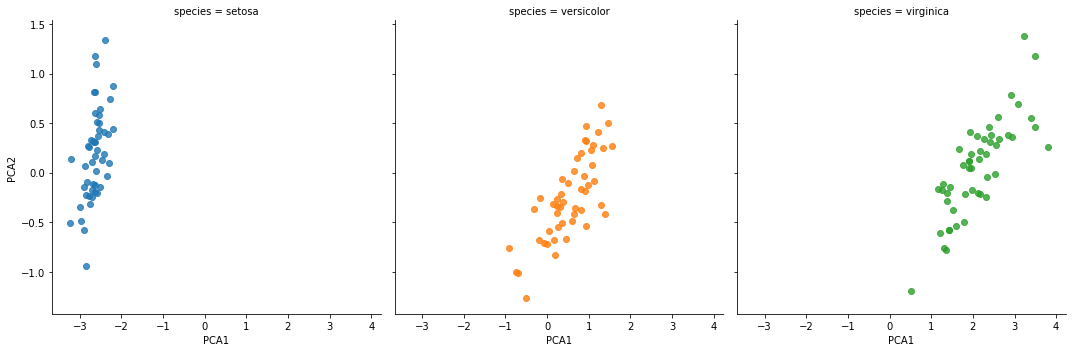

In [45]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='species', fit_reg=False);

### GMM with scaled data

In [46]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
from sklearn.preprocessing import scale
gmm = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
gmm.fit(scale(X_iris))                    # 3. Fit to data. Notice y is not specified!
y_gmm = gmm.predict(scale(X_iris))        # 4. Determine cluster labels

In [47]:
# the entries of y_gmm is {0,1,2} and the entries of y_iris is names so we need to transform 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.classes_ = [ 'virginica', 'setosa', 'versicolor']
le.transform(y_iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
y_gmm

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [49]:
accuracy_score(le.transform(y_iris), y_gmm)

0.36666666666666664

## Tuning the hyper-parameters of an estimator
reference: https://scikit-learn.org/stable/getting_started.html#automatic-parameter-searches

to find the names and current values for all parameters for a given estimator, use: 
estimator.get_params() 

A search consists of:
* an estimator (regressor or classifier such as sklearn.svm.SVC());
* a parameter space;
* a method for searching or sampling candidates;
* a cross-validation scheme; and
* a score function.

Two generic approaches to sampling search candidates are provided in scikit-learn: for given values, GridSearchCV exhaustively considers all parameter combinations, while RandomizedSearchCV can sample a given number of candidates from a parameter space with a specified distribution. 

### RandomizedSearchCV

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [51]:
param_distributions = {'n_estimators': randint(2, 6), 'max_depth': randint(1, 12)}

In [52]:
search = RandomizedSearchCV(estimator=RandomForestClassifier(),
                            n_iter=5,
                            param_distributions=param_distributions)
                            #random_state=0)
search.fit(X_train, y_train);

In [53]:
search.best_params_   ## the more the better

{'max_depth': 9, 'n_estimators': 4}

In [54]:
search.score(X_test, y_test)

0.9736842105263158

In [55]:
search.fit(X_strain, y_train);

In [56]:
search.score(X_stest, y_test)

0.9736842105263158

### GridSearchCV

In [57]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [59]:
search = GridSearchCV(estimator=SVC(), param_grid =param_grid)
search.fit(X_iris, y_iris);

In [60]:
search.cv_results_

{'mean_fit_time': array([0.0038722 , 0.00317583, 0.00209818, 0.00294218, 0.00318274,
        0.00271907, 0.00236173, 0.00284758, 0.00286398, 0.00358343,
        0.0026794 , 0.00767217]),
 'std_fit_time': array([0.00104889, 0.00077251, 0.00025433, 0.00064307, 0.00015203,
        0.00021029, 0.00052462, 0.00073306, 0.00019644, 0.00050743,
        0.00014139, 0.00263349]),
 'mean_score_time': array([0.00153775, 0.00112953, 0.00146241, 0.00139184, 0.00142341,
        0.00114512, 0.00092587, 0.00110359, 0.00140958, 0.00175824,
        0.00150366, 0.0110919 ]),
 'std_score_time': array([6.49716244e-04, 2.69156165e-04, 3.86662497e-04, 2.39742864e-04,
        3.37984532e-04, 2.49244977e-04, 4.96003711e-05, 2.13951546e-04,
        2.11620385e-04, 4.78526214e-04, 2.20758271e-04, 1.59317395e-02]),
 'param_C': masked_array(data=[1, 10, 100, 1000, 1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False,

In [61]:
print(search.best_estimator_, search.best_score_, search.best_params_)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 0.9800000000000001 {'C': 1, 'kernel': 'linear'}


It's worth to point out that the last 3 out of four kernels with Gaussian Kernel also get the best score. 

Now let's apply the same precedure to scaled data

In [62]:
from sklearn.preprocessing import scale
search = GridSearchCV(estimator=SVC(), param_grid =param_grid)
search.fit(scale(X_iris), y_iris);

In [63]:
search.cv_results_

{'mean_fit_time': array([0.00244174, 0.00184226, 0.00141301, 0.00277166, 0.00362659,
        0.00310988, 0.00135446, 0.00164933, 0.00137296, 0.00150518,
        0.00135942, 0.0016664 ]),
 'std_fit_time': array([9.58807560e-04, 4.75286418e-04, 3.04498763e-04, 1.00864346e-03,
        8.98983170e-04, 1.06809783e-03, 3.10090947e-04, 3.61432293e-04,
        4.22023126e-04, 3.99566049e-04, 8.70977236e-05, 4.32696147e-04]),
 'mean_score_time': array([0.00108294, 0.00082407, 0.00058484, 0.0013926 , 0.00146141,
        0.00100827, 0.00059085, 0.00072479, 0.00062437, 0.00075197,
        0.00074282, 0.00076237]),
 'std_score_time': array([0.00039194, 0.00024191, 0.00010892, 0.00080585, 0.00030353,
        0.00024447, 0.00014724, 0.00027476, 0.00015553, 0.00042239,
        0.00013695, 0.00015565]),
 'param_C': masked_array(data=[1, 10, 100, 1000, 1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False,

In [64]:
print(search.best_estimator_, search.best_score_, search.best_params_)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 0.9733333333333334 {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}


## Ensemble 

### Bagging + KNN

In [65]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),max_samples=0.5, max_features=0.5)

Bagging + KNN applied on the iris data

In [66]:
bagging.fit(X_train, y_train);
bagging.score(X_test, y_test)

0.9736842105263158

Bagging + KNN applied on the scaled iris data

In [67]:
bagging.fit(X_strain, y_train);
bagging.score(X_stest, y_test)

0.9736842105263158

### Extra-Tree classifier

In [68]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=5, max_depth=11, min_samples_split=2)
etc.fit(X_train, y_train)
etc.score(X_test, y_test)

1.0

In [69]:
etc.feature_importances_

array([0.11878672, 0.05434707, 0.34253707, 0.48432915])

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=5, max_depth=11, min_samples_split=2)
etc.fit(X_strain, y_train)
etc.score(X_stest, y_test)

1.0

In [71]:
etc.feature_importances_

array([0.06662238, 0.06325733, 0.54615043, 0.32396985])

### AdaBoost

In [72]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=5)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9736842105263158

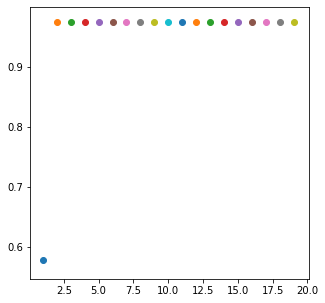

In [73]:
plt.figure(figsize = [5,5])
for i in range(1, 20):
    clf = AdaBoostClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    plt.scatter(i, clf.score(X_test, y_test))

In [74]:
clf = AdaBoostClassifier(n_estimators=5)
clf.fit(X_strain, y_train)
clf.score(X_stest, y_test)

0.9736842105263158

### GradientBoostingClassifier 

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)

0.9736842105263158

## Conclusion

In Section 3-5 of this repo we apply Naive Bayes, GMM clustering and Support vector machine methods with GridSeach on the iris data. The accuracy score of each method is

|method| Naive  Bayes | GMM clustering | RF with RandomizedSeachCV|SVC with GridSeachCV | KNN + Bagging| Extra-Tree|
|:-:| :- | -: | -: |-: |-: | :-: |
|accuracy_score (orig. data)| 0.974 | 0.967 |0.974| 0.980 | 0.974| 0.94x-1.0|
|accuracy_score (scaled data)| 0.974 | 0.967 |0.974| 0.973 | 0.921| 0.94x-1.0|

Note except SVC which requires scaling, the accuracy scores of all methods remains the same with scaled data. 
It's surprsing to see the performance of SVC is worse with scaling. 